## **WeeklyVizChallenge1:** RideShare Scatterplot

In [ ]:
# File Path: "/content/drive/My Drive/Data Analytics (Main Folder)/Projects & Work/Analytics-Projects/WeeklyVizChallenge (Ongoing Projects)/Project1_Rideshare_AverageFare_Trend/Data/top_100_rideshare_cities.csv"

In [ ]:
ls "/content/drive/My Drive/Data Analytics (Main Folder)/Projects & Work/Analytics-Projects/WeeklyVizChallenge (Ongoing Projects)/Project1_Rideshare_AverageFare_Trend/Data/top_100_rideshare_cities.csv"

 Volume in drive G is Google Drive
 Volume Serial Number is 1983-1116

 Directory of g:\content\drive\My Drive\Data Analytics (Main Folder)\Projects & Work\Analytics-Projects\WeeklyVizChallenge (Ongoing Projects)\Project1_Rideshare_AverageFare_Trend\Data



File Not Found


In [ ]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# City Data
city_data = pd.read_csv("Data/top_100_rideshare_cities.csv")
city_data.head()

,City,Driver Count,City Type
0,Bozeman,43,Rural
1,Burlington,46,Rural
2,Flagstaff,6,Rural
3,Asheville,47,Rural
4,Missoula,6,Rural


In [ ]:
# Ride Data
ride_data = pd.read_csv("Data/rideshare_data.csv")
ride_data.head()

,City,Date of Ride,Fare of Ride,Ride ID
0,Bozeman,2024-10-20,19.65,10000
1,Bozeman,2025-01-18,13.47,10001
2,Bozeman,2024-04-30,15.24,10002
3,Bozeman,2024-03-18,13.60,10003
4,Bozeman,2024-05-28,31.77,10004


In [ ]:
# Merge the city_data and ride_data on city and display the final DataFrame.
city_ride_data = pd.merge(ride_data, city_data, how="left", on=['City', 'City'])
city_ride_data.head()

,City,Date of Ride,Fare of Ride,Ride ID,Driver Count,City Type
0,Bozeman,2024-10-20,19.65,10000,43,Rural
1,Bozeman,2025-01-18,13.47,10001,43,Rural
2,Bozeman,2024-04-30,15.24,10002,43,Rural
3,Bozeman,2024-03-18,13.60,10003,43,Rural
4,Bozeman,2024-05-28,31.77,10004,43,Rural


### Bubble Plot of Ride Sharring Data

In [ ]:
# Split city_ride_data into three seperate tables. One for rural, suburban and urban.
urban_cities = city_ride_data[city_ride_data["City Type"] == "Urban"]
suburban_cities = city_ride_data[city_ride_data["City Type"] == "Suburban"]
rural_cities = city_ride_data[city_ride_data["City Type"] == "Rural"]


In [ ]:
print(urban_cities.columns)

Index(['City', 'Date of Ride', 'Fare of Ride', 'Ride ID', 'Driver Count',
       'City Type'],
      dtype='object')


In [ ]:
# Diagnosing "Fare of Ride" Issue

# Check column data types
print(urban_cities.dtypes)

# Check if 'Fare of Ride' contains non-numeric values
print(urban_cities['Fare of Ride'].unique())

# Check if any non-numeric values slipped in
print(urban_cities[pd.to_numeric(urban_cities['Fare of Ride'], errors='coerce').isna()])

City             object
Date of Ride     object
Fare of Ride    float64
Ride ID           int64
Driver Count      int64
City Type        object
dtype: object
[ 9.27 25.08 18.01 ... 14.6  23.68 36.33]
Empty DataFrame
Columns: [City, Date of Ride, Fare of Ride, Ride ID, Driver Count, City Type]
Index: []


In [ ]:
average_fare = urban_cities.groupby('City', as_index=False)['Fare of Ride'].mean()
print(average_fare.head())

          City  Fare of Ride
0  Albuquerque     29.172045
1       Austin     30.734419
2    Baltimore     24.950930
3       Boston     28.593265
4    Charlotte     25.761277


In [ ]:
# Convert Fare to Numeric (Change 'Fare of Ride' to your actual column name)
urban_cities['Fare of Ride'] = pd.to_numeric(urban_cities['Fare of Ride'], errors='coerce')

C:\Users\Mathew\AppData\Local\Temp\ipykernel_15792\1392971628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban_cities['Fare of Ride'] = pd.to_numeric(urban_cities['Fare of Ride'], errors='coerce')


In [ ]:
# Urban Values
urban_ride_count = urban_cities.groupby(["City"]).count()["Ride ID"]
urban_avg_fare = urban_cities.groupby('City')['Fare of Ride'].mean()
urban_driver_count = urban_cities.groupby('City')["Driver Count"].mean()

In [ ]:
urban_ride_count.head()

City
Albuquerque    44
Austin         43
Baltimore      43
Boston         49
Charlotte      47
Name: Ride ID, dtype: int64

In [ ]:
urban_avg_fare.head()

City
Albuquerque    29.172045
Austin         30.734419
Baltimore      24.950930
Boston         28.593265
Charlotte      25.761277
Name: Fare of Ride, dtype: float64

In [ ]:
urban_driver_count.head()

City
Albuquerque    271.0
Austin         291.0
Baltimore      697.0
Boston         998.0
Charlotte      949.0
Name: Driver Count, dtype: float64

In [ ]:
city_data[city_data["City"] == 'Albuquerque']

,City,Driver Count,City Type
97,Albuquerque,271,Urban


In [ ]:
# Suburban Values
suburban_ride_count = suburban_cities.groupby(["City"]).count()["Ride ID"]
suburban_avg_fare = suburban_cities.groupby('City')['Fare of Ride'].mean()
suburban_driver_count = suburban_cities.groupby('City')["Driver Count"].mean()

In [ ]:
# Rural Values

rural_ride_count = rural_cities.groupby(["City"]).count()["Ride ID"]
rural_avg_fare = rural_cities.groupby('City')['Fare of Ride'].mean()
rural_driver_count = rural_cities.groupby('City')["Driver Count"].mean()

In [ ]:
# Color Schemes

# 1) Classic Executive
#    Primary - #004E64 - Deep Teal-Confident and sleek
#    Secondary #FFB400 - Gold-Draws attention subtly
#    Neutral - #D9D9D9 - Light Grey-Professional tone

# 2) Financial Focus
#    Primary - #003049 - Navy Blue-Stability
#    Secondary #D62828 - Economist Red-Attention
#    Neutral - #EAE2B7 - Beige-Warm balance

# 3) Modern Minimal
#    Primary	#1D3557	- Steely Blue – modern & sharp
#    Secondary	#457B9D	- Muted Blue – complementary
#    Neutral	#F1FAEE	- Off White – clean & open

# 4) Pallet Suggestion
#    Primary	#0A6EBD (Ocean Blue)	Confident, modern, analytical feel
#    Secondary	#F5A623 (Amber Gold)	Warm contrast, for attention & highlights
#    Neutral	#4A4A4A (Charcoal Grey)	Grounded, clean, easy on the eyes

# 5) Analyst's Calm
#    Primary	#2A9D8F	Cool Teal – fresh but calm
#    Secondary	#E76F51	Salmon Red – balance and warmth
#    Neutral	#264653	Deep Slate – serious tone

# 6) Tech Inspired Pro
#    Primary	#5F0F40	(Deep Maroon) bold & distinct
#    Secondary	#9A031E	(Crimson) impact & emphasis
#    Neutral	#CBF3F0	(Pale Aqua) light & modern



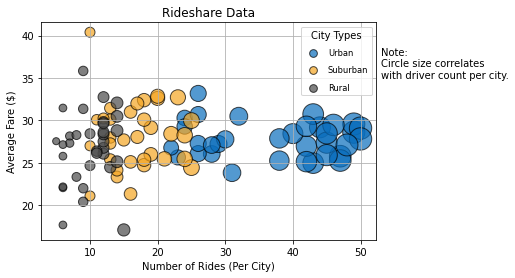

In [ ]:
# Build the Scatterplot for each City Type

plt.scatter(urban_ride_count.to_numpy(),
            urban_avg_fare.to_numpy(),
            s=10*urban_ride_count.to_numpy(),
            c='#0A6EBD',
            edgecolors='black', linewidths=1, marker='o',
            alpha=.7, label='Urban')

plt.scatter(suburban_ride_count.to_numpy(),
            suburban_avg_fare.to_numpy(),
            s=10*suburban_ride_count.to_numpy(),
            c='#F5A623',
            edgecolors='black', linewidths=1, marker='o',
            alpha=.7, label='Suburban')

plt.scatter(rural_ride_count.to_numpy(),
            rural_avg_fare.to_numpy(),
            s=10*rural_ride_count.to_numpy(),
            c='#4A4A4A',
            edgecolors='black', linewidths=1, marker='o',
            alpha=.7, label='Rural')

# Incorporate Other Aspects of the Chart
plt.title('Rideshare Data')
plt.xlabel('Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

# Create a Legend
lgnd = plt.legend(fontsize='small', mode='Expanded',
                  numpoints=1, scatterpoints=1,
                  loc='best', title='City Types',
                  labelspacing=1)
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]
lgnd.legendHandles[2]._sizes = [60]

# Incorporate a text label regarding circle size
plt.text(53, 35, 'Note:\nCircle size correlates \nwith driver count per city.')

# Save figure
plt.savefig("scatterplot.png")

# Show Plot
plt.show()


In [1]:
import os
print(os.listdir())  # Check if the file is saved in the working directory

['.config', 'sample_data']


In [ ]:
import os
print(os.getcwd())  # Prints the current working directory

g:\My Drive\Data Analytics (Main Folder)\Projects & Work\Analytics-Projects\WeeklyVizChallenge (Ongoing Projects)\Project1_Rideshare_AverageFare_Trend
